In [7]:
import pint
from scipy import constants as const

In [8]:
si = pint.UnitRegistry()

In [9]:
result_m=(100* si.km + 100* si.cm)/(100*si.s**2)
print(result_m)
print(result_m.to_base_units())
print(result_m.to(si.km/si.h**2))

molarMassDryAir = 28.966 * si.kg / si.kmol
R=8.314 * si.J / (si.kg * si.K)
Rd=(const.R*si.J/si.K/si.mol)/molarMassDryAir
print(Rd.to_base_units())
print(R/molarMassDryAir.to_base_units())

def rho(*,p, T):
    return p / (Rd * T)

rho_ = rho(p=1013 * si.hPa,T= 296 * si.K).to_base_units()
print(rho_)


1.00001 kilometer / second ** 2
1000.0100000000001 meter / second ** 2
12960129.600000001 kilometer / hour ** 2
287.0421396810053 meter ** 2 / kelvin / second ** 2
287.0261686114755 joule * mole / kelvin / kilogram ** 2
1.192263024899603 kilogram / meter ** 3


In [10]:
from matplotlib import pyplot as plt
import numpy as np
si.setup_matplotlib()
from open_atmos_jupyter_utils import show_plot

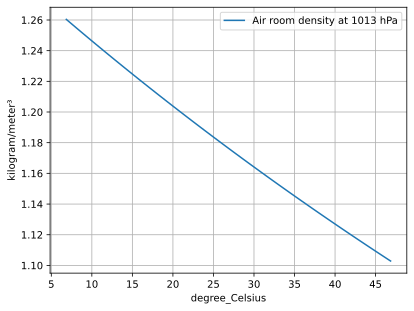

In [11]:
plt.plot(T:=np.linspace(280, 320, 100)*si.K, 
         rho(p=1013*si.hPa, T=T).to_base_units()
         ,label="Air room density at 1013 hPa"
         )
plt.grid()
# plt.xlabel("Temperature")
# plt.ylabel("Density") 
plt.legend()  
plt.gca().xaxis.set_units(si.celsius)

show_plot("airDensity_vs_temperature.pdf")